# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data

The csv file is read into pandas DataFrame 

In [3]:
df = pd.read_csv("netflix_titles_nov_2019.csv")

In [4]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


# Content Distribution On Netflix

In [5]:
type_dict = dict(df['type'].value_counts())

<ul>
<li>value_counts() returns the Series containing count of unique values ( in df['type'] column ) </li>
</ul>

In [6]:
print(type_dict.keys())
print(type_dict.values())

dict_keys(['Movie', 'TV Show'])
dict_values([3939, 1898])


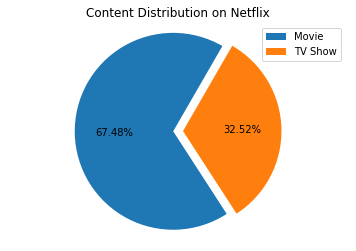

In [7]:
plt.pie(type_dict.values(),startangle=60,autopct="%1.2f%%",explode=[0,0.1])
plt.title("Content Distribution on Netflix")
plt.legend(type_dict.keys())
plt.axis('equal')
plt.show()

# Countries with most content on Netflix

In [8]:
country_dict = dict(df['country'].value_counts()[:10][::-1])

<ul>
<li>[:10] slices the dictionary into first 10 values </li>
<li>[::-1] rotate the dictionary. This is done to give values in ascending Order</li>
</ul>

In [9]:
print(country_dict.keys())
print(country_dict.values())

dict_keys(['Turkey', 'Mexico', 'France', 'Spain', 'South Korea', 'Canada', 'Japan', 'United Kingdom', 'India', 'United States'])
dict_values([78, 80, 85, 113, 133, 139, 168, 336, 697, 1907])


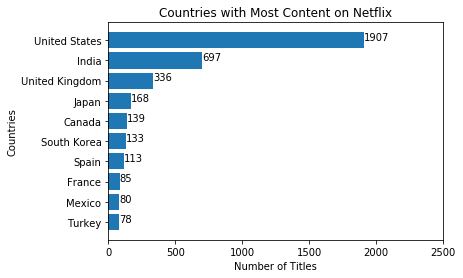

In [10]:
plt.barh(list(country_dict.keys()),list(country_dict.values()))
#plt.text(1000,'India','Mera Bharat')
for i,j in zip(list(country_dict.keys()),list(country_dict.values())):
    plt.text(j,i,str(j))
plt.xlim(0,2500)
plt.xlabel('Number of Titles')
plt.ylabel('Countries')
plt.title("Countries with Most Content on Netflix")
plt.show()

# First 10 Movies and TV Shows added

In [11]:
df_time = df.dropna(subset=['date_added'],axis=0)

<ul>
<li>Drop all the rows in which 'date_added' is NaN</li>
</ul>

In [12]:
df_time['date_added'] = df_time['date_added'].astype(np.datetime64)

<ul>
<li>Change data type of df['date_added'] values in numpy datetime format</li>
</ul>

### Divide Dataframe into 2 ; Movies and TV Shows

In [13]:
df_time_movie = df_time[df_time['type']=='Movie']

In [14]:
df_time_show = df_time[df_time['type']=='TV Show']

### Sort the DatFrames

In [15]:
df_time_movie=df_time_movie.sort_values('date_added')

In [16]:
df_time_show = df_time_show.sort_values('date_added')

In [17]:
df_time_movie.reset_index(inplace=True)

In [18]:
df_time_show.reset_index(inplace=True)

#### Display the first 10 movies added on Netflix

In [39]:
df_time_movie[['title','date_added']][:10]

,title,date_added
0,To and From New York,2008-01-01
1,Just Another Love Story,2009-05-05
2,Splatter,2009-11-18
3,Mad Ron's Prevues from Hell,2010-11-01
4,Even the Rain,2011-05-17
5,Joseph: King of Dreams,2011-09-27
6,Unspeakable Acts,2011-10-01
7,A Stoning in Fulham County,2011-10-01
8,Adam: His Song Continues,2011-10-01
9,Hard Lessons,2011-10-01


#### Display the first 10 shows added on Netflix

In [40]:
df_time_show[['title','date_added']][:10]

,title,date_added
0,Dinner for Five,2008-02-04
1,DreamWorks How to Train Your Dragon Legends,2012-07-20
2,DreamWorks Shrek's Swamp Stories,2012-08-17
3,DreamWorks Spooky Stories: Volume 2,2012-10-24
4,Jack Taylor,2013-03-31
5,DreamWorks Happy Holidays from Madagascar,2013-04-01
6,Russell Peters vs. the World,2013-10-14
7,Oscar's Oasis,2015-03-15
8,Residue,2015-04-08
9,Star-Crossed,2015-04-16


# Shortest and Longest Movie and TV Show

#### Divide Datframe into 2; Movies and Shows

<ul>
<li>We have not used the above divided Datframes beacause some rows were deleted in which there was no df['date_added'] values in it</li>
<li>Here, we donot concern about df['date_added'] values</li>
</ul>

In [49]:
df.count()

show_id         5837
title           5837
director        3936
cast            5281
country         5410
date_added      5195
release_year    5837
rating          5827
duration        5837
listed_in       5837
description     5837
type            5837
dtype: int64

<ul>
<li>show_id shows the number of titles/rows in our dataframe </li>
<li>The count of duration is equal to show_id means there is no row with a empty duration value</li>
</ul>

In [51]:
df_movies = df[df['type']=='Movie']

In [52]:
df_tvshow = df[df['type']=='TV Show']

In [53]:
df_movies.reset_index(inplace=True)

In [54]:
df_tvshow.reset_index(inplace=True)

In [55]:
for i in range(3939):
    df_movies['duration'][i] = int(df_movies['duration'][i][:-3])

<ul>
<li>Convert string values into integer example: ('110 min' into 110) </li>
</ul>

In [57]:
df_movies.sort_values('duration',inplace=True)

In [58]:
df_movies.head(2)

,index,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
740,1185,70304298,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,"June 4, 2019",2014,TV-Y7,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",Movie
402,634,81176188,American Factory: A Conversation with the Obamas,NaN,"President Barack Obama, Michelle Obama, Julia ...",NaN,"September 5, 2019",2019,TV-G,10,Documentaries,Barack and Michelle Obama talk with directors ...,Movie


In [60]:
df_movies.tail(2)

,index,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
2717,4009,60020906,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",India,"December 8, 2017",2001,PG,224,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ...",Movie
1394,2160,80988062,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",Movie


In [56]:
for i in range(1898):
    df_tvshow['duration'][i] = int(df_tvshow['duration'][i][:-7])

In [61]:
df_tvshow.sort_values('duration',inplace=True)

In [62]:
df_tvshow.tail(3)

,index,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
513,1371,70143825,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...",United States,NaN,2019,TV-14,14,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",TV Show
421,1109,70140391,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,NaN,2018,TV-14,15,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,TV Show
1065,3160,70142386,NCIS,NaN,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,NaN,2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,TV Show


# Movies added over the Years 

In [94]:
number_of_movies_added=[]
dates_movies_added=[]

In [95]:
number_of_movies_added.append(df_time_movie[df_time_movie['date_added']<'2016-01-01'].count()['show_id'])
dates_movies_added.append('<2016')

In [96]:
number_of_movies_added.append(df_time_movie[(df_time_movie['date_added']<'2017-01-01') & (df_time_movie['date_added']>='2016-01-01')].count()['show_id'])
dates_movies_added.append('2016')


In [97]:
number_of_movies_added.append(df_time_movie[(df_time_movie['date_added']<'2018-01-01') & (df_time_movie['date_added']>='2017-01-01')].count()['show_id'])
dates_movies_added.append('2017')

In [98]:
number_of_movies_added.append(df_time_movie[(df_time_movie['date_added']<'2019-01-01') & (df_time_movie['date_added']>='2018-01-01')].count()['show_id'])
dates_movies_added.append('2018')

In [99]:
number_of_movies_added.append(df_time_movie[(df_time_movie['date_added']<'2020-01-01') & (df_time_movie['date_added']>='2019-01-01')].count()['show_id'])
dates_movies_added.append('2019')

In [100]:
number_of_movies_added

[104, 264, 913, 1290, 1367]

In [101]:
dates_movies_added

['<2016', '2016', '2017', '2018', '2019']

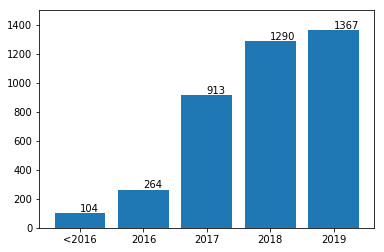

In [121]:
plt.bar(dates_movies_added,number_of_movies_added)
for i,j in zip(dates_movies_added, number_of_movies_added):
    plt.text(i,j+10,str(j))
plt.ylim(0,1500)
plt.show()

# Shows added over the Years

In [104]:
number_of_shows_added=[]

In [105]:
number_of_shows_added.append(df_time_show[df_time_show['date_added']<'2016-01-01'].count()['show_id'])

In [106]:
number_of_shows_added.append(df_time_show[(df_time_show['date_added']<'2017-01-01') & (df_time_show['date_added']>='2016-01-01') ].count()['show_id'])

In [107]:
number_of_shows_added.append(df_time_show[(df_time_show['date_added']<'2018-01-01') & (df_time_show['date_added']>='2017-01-01') ].count()['show_id'])

In [108]:
number_of_shows_added.append(df_time_show[(df_time_show['date_added']<'2019-01-01') & (df_time_show['date_added']>='2018-01-01') ].count()['show_id'])

In [109]:
number_of_shows_added.append(df_time_show[(df_time_show['date_added']<'2020-01-01') & (df_time_show['date_added']>='2019-01-01') ].count()['show_id'])

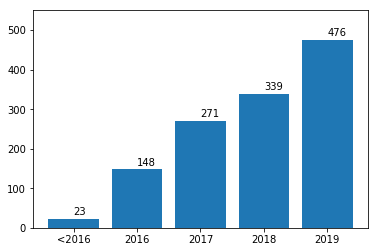

In [123]:
plt.bar(dates_movies_added, number_of_shows_added)
for i,j in zip(dates_movies_added,number_of_shows_added):
    plt.text(i,j+10,str(j))
plt.ylim(0,550)
plt.show()

# Content Distribution over Years

In [134]:
x = np.arange(5)

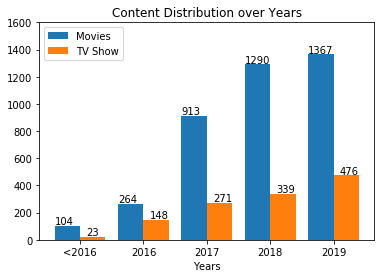

In [200]:
plt.bar(x-0.2,number_of_movies_added,width=0.4)
plt.bar(x+0.2,number_of_shows_added,width=0.4)
plt.xticks(x,dates_movies_added)
for i,j in zip(x,number_of_movies_added):
    plt.text(i-0.4,j+10,str(j))
for i,j in zip(x,number_of_shows_added):
    plt.text(i+0.1,j+10,str(j))
plt.ylim(0,1600)
#plt.legend(['Movies','TV Show'],bbox_to_anchor = (0.79,1))
plt.legend(['Movies','TV Show'],loc='upper left')
plt.xlabel('Years')
plt.title('Content Distribution over Years')#
#plt.grid(axis='y')
plt.show()

# Genre Distribution

In [213]:
df['listed_in'].value_counts()[:10]

Documentaries                                       297
Stand-Up Comedy                                     265
Dramas, International Movies                        238
Dramas, Independent Movies, International Movies    170
Comedies, Dramas, International Movies              157
Kids' TV                                            153
Documentaries, International Movies                 147
Children & Family Movies                            115
Comedies, International Movies                      113
Children & Family Movies, Comedies                  110
Name: listed_in, dtype: int64

<ul>
<li>Look Carefully, (Dcoumentries) and (Documentries, International Movies) they have been considered 2 different categories</li>
<li>What we want is a different category for Documentries and International Movies and movie with tags of both Documentry and international movie should be counted in both the categories</li>
</ul>

In [202]:
df['listed_in'][0]

'International TV Shows, Korean TV Shows, Romantic TV Shows'

In [203]:
dummies = df['listed_in'].str.get_dummies(sep=', ')

<ul>
<li>Creating Dummies</li>
</ul>

In [204]:
df_listedin = pd.concat([df,dummies],axis=1)

<ul>
<li>Creating a new dataframe, combining original dataframe and dummies</li>
</ul>

In [310]:
df_listedin.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",...,0,0,0,0,0,0,0,0,0,0
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies",...,0,0,0,0,0,0,0,0,0,0
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",...,0,0,0,0,0,0,0,0,0,0
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies",...,0,0,0,0,0,0,0,0,0,0
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,...,0,0,0,0,0,0,0,0,0,0


In [205]:
dummies_list = list(dummies.columns)

In [206]:
df_listedin[df_listedin['Action & Adventure']==1]['show_id'].count()

532

In [288]:
dict_listed_in={}


In [289]:
for i in dummies_list:
    x = df_listedin[df_listedin[i]==1]['show_id'].count()
    dict_listed_in.update({i:x})


In [290]:
print(dict_listed_in)

{'Action & Adventure': 532, 'Anime Features': 41, 'Anime Series': 111, 'British TV Shows': 205, 'Children & Family Movies': 340, 'Classic & Cult TV': 24, 'Classic Movies': 65, 'Comedies': 992, 'Crime TV Shows': 355, 'Cult Movies': 42, 'Documentaries': 658, 'Docuseries': 271, 'Dramas': 1488, 'Faith & Spirituality': 46, 'Horror Movies': 229, 'Independent Movies': 516, 'International Movies': 1797, 'International TV Shows': 966, "Kids' TV": 313, 'Korean TV Shows': 120, 'LGBTQ Movies': 59, 'Movies': 55, 'Music & Musicals': 229, 'Reality TV': 146, 'Romantic Movies': 338, 'Romantic TV Shows': 265, 'Sci-Fi & Fantasy': 165, 'Science & Nature TV': 66, 'Spanish-Language TV Shows': 114, 'Sports Movies': 149, 'Stand-Up Comedy': 273, 'Stand-Up Comedy & Talk Shows': 42, 'TV Action & Adventure': 122, 'TV Comedies': 425, 'TV Dramas': 574, 'TV Horror': 51, 'TV Mysteries': 66, 'TV Sci-Fi & Fantasy': 66, 'TV Shows': 10, 'TV Thrillers': 43, 'Teen TV Shows': 41, 'Thrillers': 353}


In [291]:
dict_listed_in = dict(sorted(dict_listed_in.items(),key= lambda x: x[1],reverse=True),)

In [309]:
print(dict_listed_in)

{'International Movies': 1797, 'Dramas': 1488, 'Comedies': 992, 'International TV Shows': 966, 'Documentaries': 658, 'TV Dramas': 574, 'Action & Adventure': 532, 'Independent Movies': 516, 'TV Comedies': 425, 'Crime TV Shows': 355, 'Thrillers': 353, 'Children & Family Movies': 340, 'Romantic Movies': 338, "Kids' TV": 313, 'Stand-Up Comedy': 273, 'Docuseries': 271, 'Romantic TV Shows': 265, 'Horror Movies': 229, 'Music & Musicals': 229, 'British TV Shows': 205, 'Sci-Fi & Fantasy': 165, 'Sports Movies': 149, 'Reality TV': 146, 'TV Action & Adventure': 122, 'Korean TV Shows': 120, 'Spanish-Language TV Shows': 114, 'Anime Series': 111, 'Science & Nature TV': 66, 'TV Mysteries': 66, 'TV Sci-Fi & Fantasy': 66, 'Classic Movies': 65, 'LGBTQ Movies': 59, 'Movies': 55, 'TV Horror': 51, 'Faith & Spirituality': 46, 'TV Thrillers': 43, 'Cult Movies': 42, 'Stand-Up Comedy & Talk Shows': 42, 'Anime Features': 41, 'Teen TV Shows': 41, 'Classic & Cult TV': 24, 'TV Shows': 10}


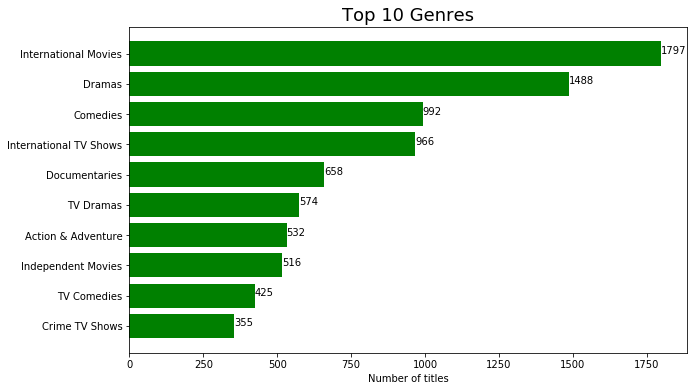

In [308]:
plt.figure(figsize=(10,6))
plt.barh(list(dict_listed_in.keys())[:10][::-1],list(dict_listed_in.values())[:10][::-1],color='g')
for i,j in zip(list(dict_listed_in.keys())[:10][::-1], list(dict_listed_in.values())[:10][::-1]):
    plt.text(j,i,str(j))
plt.title('Top 10 Genres', fontdict={'fontsize': 18})
plt.xlabel('Number of titles')
plt.show()